In [44]:
import os
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

stem_model_info = {}
noStem_model_info = {}

path = './stem/'

file_name = os.listdir(path)
document_name = []

for file in file_name:
    stem_model_info[file] = {}
    document_name = os.listdir(path + file)
    for doc in document_name:
        if os.path.isfile(path + file + '/' + doc):
            with open(path + file + '/' + doc, 'r', encoding="utf-8") as f:
                str = f.read()
                data = []
                tmp = str.split('\n')
                for i in tmp:
                    j = i.split('\t')
                    data.append(j)
                data.pop()
                doc = doc.split('.')
                doc = doc[0]
                stem_model_info[file][doc] = data

path = './noStem/'

file_name = os.listdir(path)
document_name = []

for file in file_name:
    noStem_model_info[file] = {}
    document_name = os.listdir(path + file)
    for doc in document_name:
        if os.path.isfile(path + file + '/' + doc):
            with open(path + file + '/' + doc, 'r', encoding="utf-8") as f:
                str = f.read()
                data = []
                tmp = str.split('\n')
                for i in tmp:
                    j = i.split('\t')
                    data.append(j)
                data.pop()
                doc = doc.split('.')
                doc = doc[0]
                noStem_model_info[file][doc] = data

In [45]:
pp.pprint(stem_model_info)

{   'Laplace': {   'avg_prec': [['0.1571']],
                   'inter_RPcurve': [   ['0.00', '0.6089'],
                                        ['0.10', '0.3993'],
                                        ['0.20', '0.2681'],
                                        ['0.30', '0.2171'],
                                        ['0.40', '0.1712'],
                                        ['0.50', '0.1385'],
                                        ['0.60', '0.0971'],
                                        ['0.70', '0.0590'],
                                        ['0.80', '0.0331'],
                                        ['0.90', '0.0166'],
                                        ['1.00', '0.0064']],
                   'prec': [   ['5', '0.3280'],
                               ['10', '0.2920'],
                               ['15', '0.2480'],
                               ['20', '0.2260'],
                               ['30', '0.1933'],
                               ['100', '0.1234'],


In [46]:
pp.pprint(noStem_model_info)

{   'Laplace': {   'avg_prec': [['0.1540']],
                   'inter_RPcurve': [   ['0.00', '0.6448'],
                                        ['0.10', '0.4077'],
                                        ['0.20', '0.2640'],
                                        ['0.30', '0.2149'],
                                        ['0.40', '0.1641'],
                                        ['0.50', '0.1282'],
                                        ['0.60', '0.0873'],
                                        ['0.70', '0.0542'],
                                        ['0.80', '0.0258'],
                                        ['0.90', '0.0110'],
                                        ['1.00', '0.0035']],
                   'prec': [   ['5', '0.3480'],
                               ['10', '0.2940'],
                               ['15', '0.2600'],
                               ['20', '0.2330'],
                               ['30', '0.1987'],
                               ['100', '0.1146'],


In [47]:
x = []
y = []
for file in stem_model_info:
    tmp = []
    tmp.append(stem_model_info[file]['totalnum'])
    print(tmp)
#     for data in tmp:
#         x.append(data[0])
#         y.append(int(data[1]))

# x
    

[[['Retrieved:', '48887'], ['Relevant:', '2279'], ['Rel_ret:', '1421']]]
[[['Retrieved:', '48887'], ['Relevant:', '2279'], ['Rel_ret:', '1581']]]
[[['Retrieved:', '48887'], ['Relevant:', '2279'], ['Rel_ret:', '1495']]]
[[['Retrieved:', '48887'], ['Relevant:', '2279'], ['Rel_ret:', '1699']]]


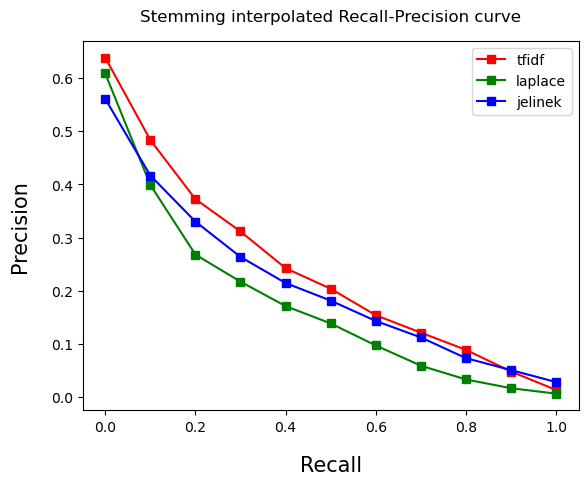

In [48]:
recall = []
prec_tfidf = []
prec_laplace=[]
prec_jelinek=[]

for i in stem_model_info['tfidf']['inter_RPcurve']:
    recall.append(float(i[0]))
    prec_tfidf.append(float(i[1]))

for i in stem_model_info['Laplace']['inter_RPcurve']:
    prec_laplace.append(float(i[1]))

for i in stem_model_info['jelinek']['inter_RPcurve']:
    prec_jelinek.append(float(i[1]))

    
plt.plot(recall,prec_tfidf,'s-',color = 'r', label="tfidf")
plt.plot(recall,prec_laplace,'s-',color = 'g', label="laplace")
plt.plot(recall,prec_jelinek,'s-',color = 'b', label="jelinek")

plt.title("Stemming interpolated Recall-Precision curve", x=0.5, y=1.03)
plt.xlabel("Recall", fontsize=15, labelpad = 15)
plt.ylabel("Precision", fontsize=15, labelpad = 15)
plt.legend(loc = "best", fontsize=10)

plt.show()

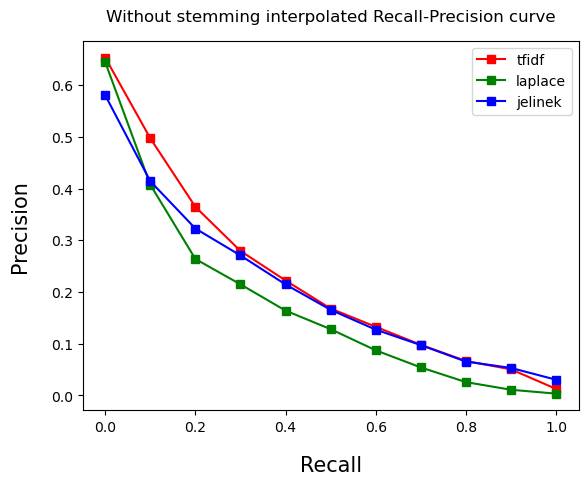

In [49]:
recall = []
prec_tfidf = []
prec_laplace=[]
prec_jelinek=[]

for i in noStem_model_info['tfidf']['inter_RPcurve']:
    recall.append(float(i[0]))
    prec_tfidf.append(float(i[1]))

for i in noStem_model_info['Laplace']['inter_RPcurve']:
    prec_laplace.append(float(i[1]))

for i in noStem_model_info['jelinek']['inter_RPcurve']:
    prec_jelinek.append(float(i[1]))

    
plt.plot(recall,prec_tfidf,'s-',color = 'r', label="tfidf")
plt.plot(recall,prec_laplace,'s-',color = 'g', label="laplace")
plt.plot(recall,prec_jelinek,'s-',color = 'b', label="jelinek")

plt.title("Without stemming interpolated Recall-Precision curve", x=0.5, y=1.03)
plt.xlabel("Recall", fontsize=15, labelpad = 15)
plt.ylabel("Precision", fontsize=15, labelpad = 15)
plt.legend(loc = "best", fontsize=10)

plt.show()

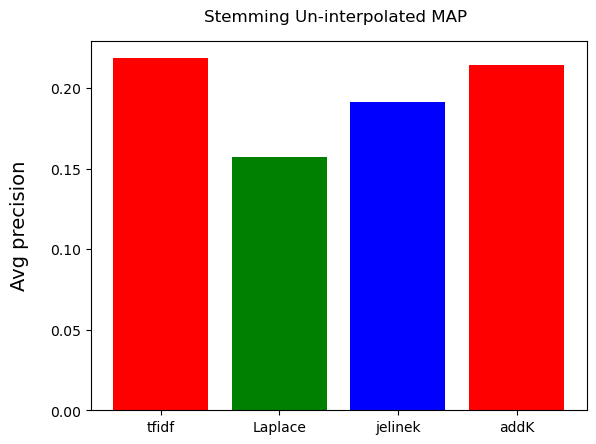

In [50]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['avg_prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Stemming Un-interpolated MAP ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("Avg precision", fontsize=14, labelpad = 15)

plt.show()

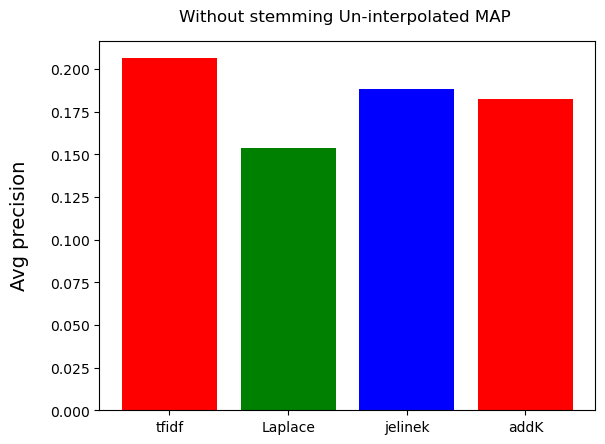

In [51]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['avg_prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Without stemming Un-interpolated MAP ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("Avg precision", fontsize=14, labelpad = 15)

plt.show()

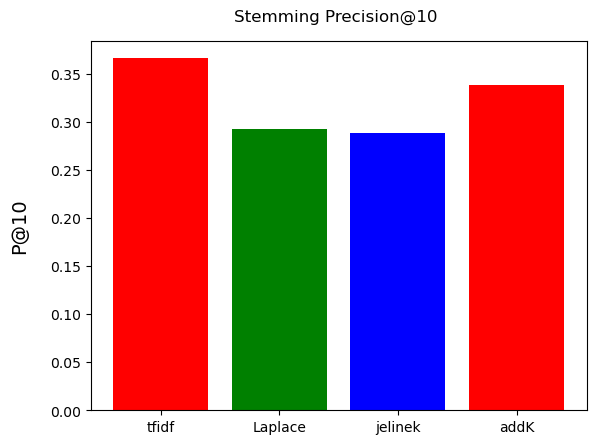

In [52]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['prec'][1][1]))

x.reverse()
y.reverse()

plt.title("Stemming Precision@10 ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("P@10", fontsize=14, labelpad = 15)

plt.show()

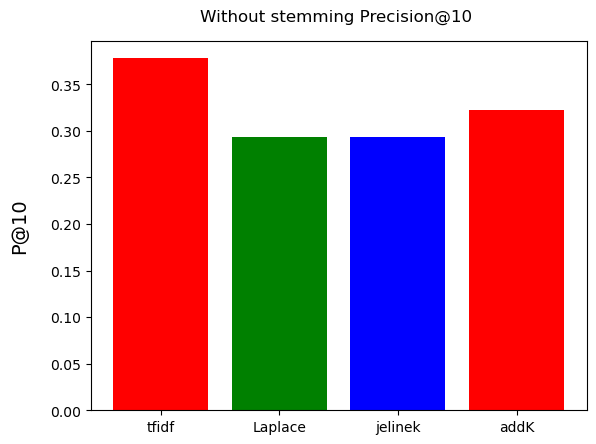

In [53]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['prec'][1][1]))

x.reverse()
y.reverse()

plt.title("Without stemming Precision@10 ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("P@10", fontsize=14, labelpad = 15)

plt.show()

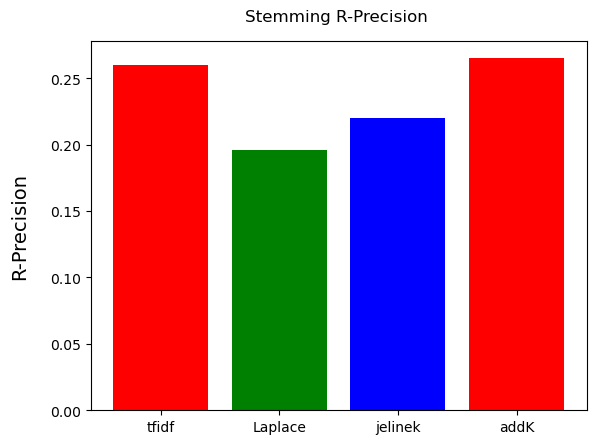

In [54]:
x = []
y = []
for file in stem_model_info:
    x.append(file)
    y.append(float(stem_model_info[file]['r-prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Stemming R-Precision ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("R-Precision", fontsize=14, labelpad = 15)

plt.show()

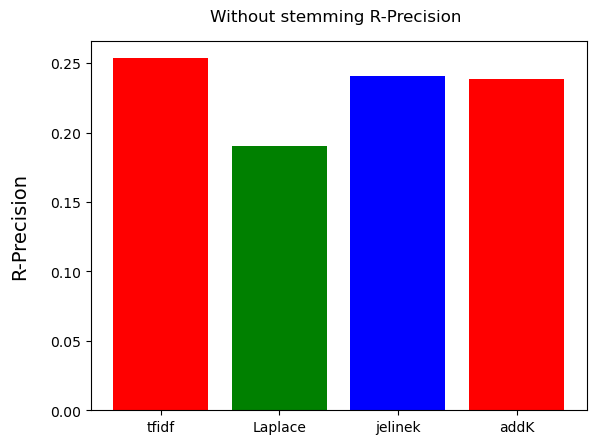

In [55]:
x = []
y = []
for file in noStem_model_info:
    x.append(file)
    y.append(float(noStem_model_info[file]['r-prec'][0][0]))

x.reverse()
y.reverse()

plt.title("Without stemming R-Precision ", x=0.5, y=1.03)
plt.bar(x,y, color=['r', 'g', 'b'])
plt.ylabel("R-Precision", fontsize=14, labelpad = 15)

plt.show()